In [2]:
#import libraries

import pandas as pd
import geopandas as gpd

In [4]:
import cenpy
from cenpy import products

In [70]:
#census tract data
acs = cenpy.products.ACS() 

Variables of interest:
- Median household income: B19013_001E
- Units in housing: DP04_0006E to DP04_00013E

In [18]:
list = []
for i in range(6,14):
    list.append("DP04_000" + str(i) + "E")
print(list)

['DP04_0006E', 'DP04_0007E', 'DP04_0008E', 'DP04_0009E', 'DP04_00010E', 'DP04_00011E', 'DP04_00012E', 'DP04_00013E']


In [ ]:
censusDf = acs.from_state('CA', level='tract',
                                        variables=['DP04_0006E', 'DP04_0007E', 'DP04_0008E', 
                                                   'DP04_0009E', 'DP04_0010E', 'DP04_0011E', 
                                                   'DP04_0012E', 'DP04_0013E', 'B19013_001E' 
                                                   ])


,GEOID,geometry,B19013_001E,NAME,state,county,tract
0,06037670328,"POLYGON ((-13183928.750 3998590.110, -13183871...",177857.0,"Census Tract 6703.28, Los Angeles County, Cali...",06,037,670328
1,06037990200,"POLYGON ((-13206496.550 4033174.070, -13206119...",NaN,"Census Tract 9902, Los Angeles County, California",06,037,990200
2,06037670326,"POLYGON ((-13182706.680 4000184.830, -13182626...",155000.0,"Census Tract 6703.26, Los Angeles County, Cali...",06,037,670326
3,06037980013,"POLYGON ((-13179812.820 4019143.240, -13179813...",NaN,"Census Tract 9800.13, Los Angeles County, Cali...",06,037,980013
4,06037602302,"POLYGON ((-13177861.170 4015210.820, -13177860...",126116.0,"Census Tract 6023.02, Los Angeles County, Cali...",06,037,602302


In [60]:
censusDf = products.ACS().from_county('Los Angeles, CA', level='tract',
                                        variables=['DP04_0006E', 'DP04_0007E', 'DP04_0008E', 
                                                   'DP04_0009E', 'DP04_0010E', 'DP04_0011E', 
                                                   'DP04_0012E', 'DP04_0013E', 'B19013_001E' 
                                                   ])


/Users/hfrahn/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/hfrahn/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/hfrahn/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property inste

In [3]:
import requests, json
#we can also just try to use the census API and not cenpy?
#https://api.census.gov/data/2017/acs/acs5/profile/groups/DP04.html

requestString = "https://api.census.gov/data/2020/acs/acs5/profile?get=NAME,DP04_0006E,DP04_0007E,DP04_0008E,DP04_0009E,DP04_0010E,DP04_0011E,DP04_0012E,DP04_0013E&for=tract:*&in=state:06"
r = requests.get(requestString)
d=json.loads(r.text)
unitsHousingDf = pd.DataFrame(d[1:], columns = d[0])
unitsHousingDf.head()



,NAME,DP04_0006E,DP04_0007E,DP04_0008E,DP04_0009E,DP04_0010E,DP04_0011E,DP04_0012E,DP04_0013E,state,county,tract
0,"Census Tract 3131.06, Contra Costa County, Cal...",2033,1492,33,106,71,46,177,108,06,013,313106
1,"Census Tract 3131.02, Contra Costa County, Cal...",1554,626,182,12,145,205,24,347,06,013,313102
2,"Census Tract 3131.04, Contra Costa County, Cal...",964,391,47,0,13,134,70,309,06,013,313104
3,"Census Tract 3131.05, Contra Costa County, Cal...",1837,921,35,15,154,274,84,130,06,013,313105
4,"Census Tract 3131.07, Contra Costa County, Cal...",782,762,0,0,0,0,0,20,06,013,313107


In [5]:
unitsHousingDf.describe()

,NAME,DP04_0006E,DP04_0007E,DP04_0008E,DP04_0009E,DP04_0010E,DP04_0011E,DP04_0012E,DP04_0013E,state,county,tract
count,9129,9129,9129,9129,9129,9129,9129,9129,9129,9129,9129,9129
unique,9129,2427,2149,686,353,540,594,564,1135,1,58,7369
top,"Census Tract 3131.06, Contra Costa County, Cal...",0,0,0,0,0,0,0,0,06,037,000400
freq,1,81,179,1294,3656,2354,2526,3131,2376,9129,2498,16


In [6]:
#have to make a different request bc this variable isn't in the "profiles" subsection
rs2 = "https://api.census.gov/data/2020/acs/acs5?get=NAME,B19013_001E&for=tract:*&in=state:06"
r2 = requests.get(rs2)
d2=json.loads(r2.text)
IncomeDf = pd.DataFrame(d2[1:], columns = d2[0])
IncomeDf.head()


,NAME,B19013_001E,state,county,tract
0,"Census Tract 3131.02, Contra Costa County, Cal...",78856,06,013,313102
1,"Census Tract 3131.04, Contra Costa County, Cal...",48316,06,013,313104
2,"Census Tract 3131.05, Contra Costa County, Cal...",62422,06,013,313105
3,"Census Tract 3131.06, Contra Costa County, Cal...",130091,06,013,313106
4,"Census Tract 3131.07, Contra Costa County, Cal...",122727,06,013,313107


In [7]:
unitsHousingDf['tract'] = unitsHousingDf['tract'].astype(int)
IncomeDf['tract'] = IncomeDf['tract'].astype(int)



In [8]:
#now let's join the two together

unitsHousingDf.set_index("tract").join(IncomeDf.set_index("tract"), on = "tract", rsuffix='_right')



,NAME,DP04_0006E,DP04_0007E,DP04_0008E,DP04_0009E,DP04_0010E,DP04_0011E,DP04_0012E,DP04_0013E,state,county,NAME_right,B19013_001E,state_right,county_right
tract,,,,,,,,,,,,,,,
313106,"Census Tract 3131.06, Contra Costa County, Cal...",2033,1492,33,106,71,46,177,108,06,013,"Census Tract 3131.06, Contra Costa County, Cal...",130091,06,013
313102,"Census Tract 3131.02, Contra Costa County, Cal...",1554,626,182,12,145,205,24,347,06,013,"Census Tract 3131.02, Contra Costa County, Cal...",78856,06,013
313104,"Census Tract 3131.04, Contra Costa County, Cal...",964,391,47,0,13,134,70,309,06,013,"Census Tract 3131.04, Contra Costa County, Cal...",48316,06,013
313105,"Census Tract 3131.05, Contra Costa County, Cal...",1837,921,35,15,154,274,84,130,06,013,"Census Tract 3131.05, Contra Costa County, Cal...",62422,06,013
313107,"Census Tract 3131.07, Contra Costa County, Cal...",782,762,0,0,0,0,0,20,06,013,"Census Tract 3131.07, Contra Costa County, Cal...",122727,06,013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,"Census Tract 42, Ventura County, California",1383,1275,49,0,0,26,9,0,06,111,"Census Tract 42, San Diego County, California",127069,06,073
4200,"Census Tract 42, Ventura County, California",1383,1275,49,0,0,26,9,0,06,111,"Census Tract 42, Tulare County, California",35365,06,107
4200,"Census Tract 42, Ventura County, California",1383,1275,49,0,0,26,9,0,06,111,"Census Tract 42, Ventura County, California",91889,06,111


In [100]:
tracts = gpd.read_file("cb_2020_06_tract_500k/cb_2020_06_tract_500k.shp")
len(tracts)

9109

In [ ]:
#FINALLY join tracts data to census data to give full census tract
censusTracts = 

Now let's get the EV data and subset it to just chargers in California.

In [2]:
#have to run this to fix my geopandas for some reason; if yours works don't run it
##solution from https://gis.stackexchange.com/questions/375361/zonal-stats-returns-proj-error
import os
import pyproj as p
os.environ['PROJ_LIB'] = '/Users/hfrahn/opt/anaconda3/envs/uds/bin/pyproj'
p.datadir.set_data_dir('/Users/hfrahn/opt/anaconda3/envs/uds/bin/pyproj')

In [43]:

apiKey = "eCN7llpPT79TmygqmvC71QdnnWdOquoRdnCR1DXo"
requestString = "https://developer.nrel.gov/api/alt-fuel-stations/v1.geojson?api_key={}&fuel_type=ELEC&state=CA".format(apiKey)
chargers = gpd.read_file(requestString)


34.2483191527193

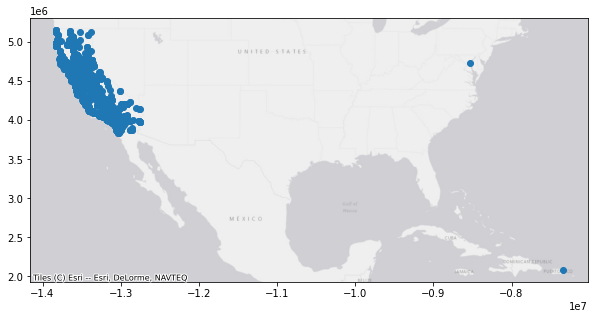

In [44]:
# now let's plot them just to make sure they are in CA
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
chargers.to_crs("EPSG:3857").plot(ax=ax)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldGrayCanvas)

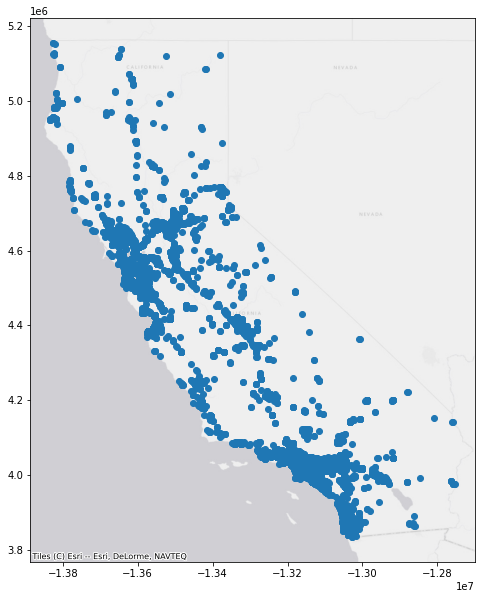

In [45]:
#there seems to be a couple that aren't in CA so let's remove those
#https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.cx.html#geopandas.GeoDataFrame.cx
#CA bounding box coordinates:
#31, -112
#42, -126
chargers = chargers.cx[-126:-112, 31:42]

#plot again just to check
fig, ax = plt.subplots(figsize=(10,10))
chargers.to_crs("EPSG:3857").plot(ax=ax)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldGrayCanvas)

That looks better!